Practice file adopted from TF tutorial by Shery Moore, Google Brain (https://www.youtube.com/watch?v=Ejec3ID_h0w)

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [24]:
tf.reset_default_graph()

## The tensorboard snapshot of the data graph
![Tensorboard](img/linear_regression1.png)

### Dataset

In [25]:
with tf.name_scope("input"):
    xdata = tf.placeholder(tf.float64, shape=[100], name="xdata")
with tf.name_scope("ground_truth"):
    yground = tf.placeholder(tf.float64,shape=[100], name="yground")
x = np.random.rand(100)
noise = np.random.normal(scale=0.01, size = len(x))
y = x * 0.1 + noise + 0.3

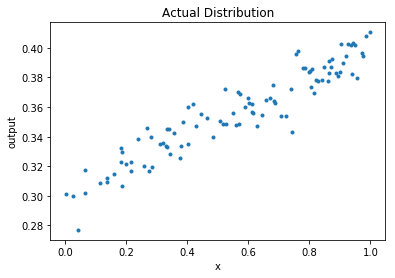

In [26]:
plt.plot(x, y,".")
plt.title("Actual Distribution")
plt.xlabel("x")
plt.ylabel("output")
plt.show()

### Model

In [27]:
with tf.name_scope("weight"):
    W = tf.Variable(tf.random_uniform([1],0.0,1.0,dtype=tf.float64),name="weight")
with tf.name_scope("bias"):
    b = tf.Variable(tf.zeros(1,dtype=tf.float64),name="bias")
with tf.name_scope("output"):
    y_pred = W*xdata + b


In [28]:
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.square(y_pred-yground))  #operation
optimizer = tf.train.GradientDescentOptimizer(0.1)
with tf.name_scope('train'):
    train = optimizer.minimize(loss)

In [29]:
init = tf.global_variables_initializer()  #operation to initialize all variables

In [30]:
tf.summary.scalar("loss",loss)

<tf.Tensor 'loss_1:0' shape=() dtype=string>

In [31]:
merged = tf.summary.merge_all()
graph = tf.Graph()

In [32]:
xdata.dtype == x.dtype

True

### Training

In [33]:
sess = tf.Session()
sess.run(init)  #actual initilization happens here
train_writer = tf.summary.FileWriter("/Users/kirankannar/tensorflow_labs/linear_regression_1",sess.graph)
y_pred_initial = sess.run(y_pred,feed_dict={xdata:x})
iterations = 500
for step in range(iterations):
        _,m = sess.run([merged, train],feed_dict={xdata:x, yground:y})
        train_writer.add_summary(m,step)
        #train_writer.add_summary(merged, step)

In [34]:
#print(tf.get_default_graph().as_graph_def())

In [35]:
sess.run([W,b])

[array([ 0.10013098]), array([ 0.30044111])]

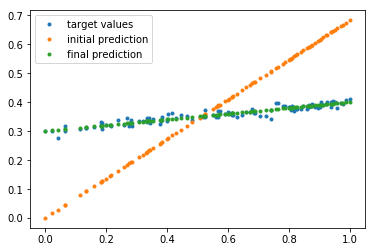

In [36]:
plt.plot(x, y,".",label="target values")
plt.plot(x, y_pred_initial,".",label="initial prediction")
plt.plot(x, sess.run(y_pred,feed_dict={xdata:x, yground:y}),".", label="final prediction")
plt.legend()
plt.show()
